EMAIL CLASSIFICATION

MANAN GANDHI

Importing the required dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud


Loading the dataset

In [2]:
path_file = r"C:\Users\91996\Downloads\spam.csv"

try:
    df = pd.read_csv(path_file, encoding='utf-8')
except UnicodeDecodeError:
    # 'latin1' encoding
    df = pd.read_csv(path_file, encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
label_encoder= LabelEncoder()
df['v1']= label_encoder.fit_transform(df['v1'])  # spam as 0 and ham as 1
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


Data Preprocessing

1)Lower Casing

2)Tokenization

3)Removing Stopwords

4)Lemmatization

5)Feature Engineering

In [5]:
df['v3'] = df['v2'].str.lower()
df['tokenized_column'] = df['v2'].apply(word_tokenize)
stop_words = set(stopwords.words('english'))
df['tokenized_column'] = df['tokenized_column'].apply(lambda tokens: [token for token in tokens if token not in stop_words])
stemmer = PorterStemmer()
df['stemmed_column'] = df['tokenized_column'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])

In [6]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,v3,tokenized_column,stemmed_column
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,"go until jurong point, crazy.. available only ...","[Go, jurong, point, ,, crazy, .., Available, b...","[go, jurong, point, ,, crazi, .., avail, bugi,..."
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,ok lar... joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[ok, lar, ..., joke, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,free entry in 2 a wkly comp to win fa cup fina...,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,u dun say so early hor... u c already then say...,"[U, dun, say, early, hor, ..., U, c, already, ...","[u, dun, say, earli, hor, ..., u, c, alreadi, ..."
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,"nah i don't think he goes to usf, he lives aro...","[Nah, I, n't, think, goes, usf, ,, lives, arou...","[nah, i, n't, think, goe, usf, ,, live, around..."
...,...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,this is the 2nd time we have tried 2 contact u...,"[This, 2nd, time, tried, 2, contact, u., U, å£...","[thi, 2nd, time, tri, 2, contact, u., u, å£750..."
5568,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,will ì_ b going to esplanade fr home?,"[Will, Ì_, b, going, esplanade, fr, home, ?]","[will, ì_, b, go, esplanad, fr, home, ?]"
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,"pity, * was in mood for that. so...any other s...","[Pity, ,, *, mood, ., So, ..., suggestions, ?]","[piti, ,, *, mood, ., so, ..., suggest, ?]"
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,the guy did some bitching but i acted like i'd...,"[The, guy, bitching, I, acted, like, 'd, inter...","[the, guy, bitch, i, act, like, 'd, interest, ..."


In [7]:
df['text_length'] = df['v3'].apply(len)
df['num_words'] = df['tokenized_column'].apply(len)
df['num-sents']=df['v3'].apply(lambda x :len(nltk.sent_tokenize(x)))
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,v3,tokenized_column,stemmed_column,text_length,num_words,num-sents
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,"go until jurong point, crazy.. available only ...","[Go, jurong, point, ,, crazy, .., Available, b...","[go, jurong, point, ,, crazi, .., avail, bugi,...",111,20,1
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,ok lar... joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[ok, lar, ..., joke, wif, u, oni, ...]",29,8,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,free entry in 2 a wkly comp to win fa cup fina...,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",155,32,1
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,u dun say so early hor... u c already then say...,"[U, dun, say, early, hor, ..., U, c, already, ...","[u, dun, say, earli, hor, ..., u, c, alreadi, ...",49,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,"nah i don't think he goes to usf, he lives aro...","[Nah, I, n't, think, goes, usf, ,, lives, arou...","[nah, i, n't, think, goe, usf, ,, live, around...",61,10,1
...,...,...,...,...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,this is the 2nd time we have tried 2 contact u...,"[This, 2nd, time, tried, 2, contact, u., U, å£...","[thi, 2nd, time, tri, 2, contact, u., u, å£750...",161,27,4
5568,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,will ì_ b going to esplanade fr home?,"[Will, Ì_, b, going, esplanade, fr, home, ?]","[will, ì_, b, go, esplanad, fr, home, ?]",37,8,1
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,"pity, * was in mood for that. so...any other s...","[Pity, ,, *, mood, ., So, ..., suggestions, ?]","[piti, ,, *, mood, ., so, ..., suggest, ?]",57,9,2
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,the guy did some bitching but i acted like i'd...,"[The, guy, bitching, I, acted, like, 'd, inter...","[the, guy, bitch, i, act, like, 'd, interest, ...",125,16,1


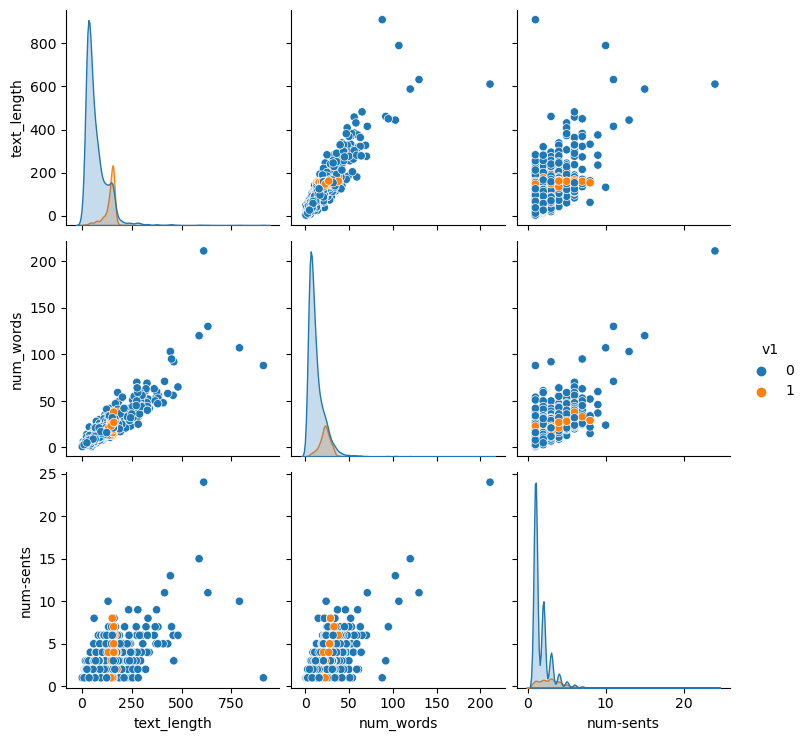

In [8]:
sns.pairplot(df,hue='v1')

<Axes: >

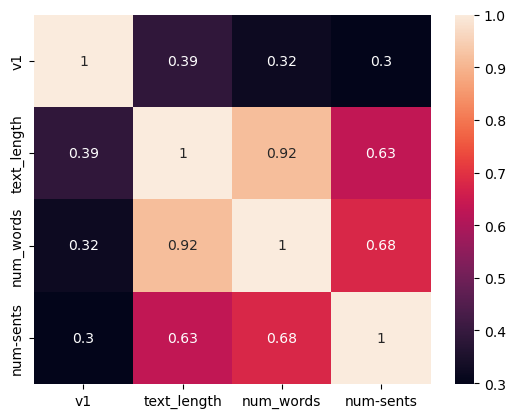

In [9]:
correlation=df[['v1','text_length','num_words','num-sents']].corr()
sns.heatmap(correlation,annot=True)

Text(0.5, 1.0, 'Classification of emails')

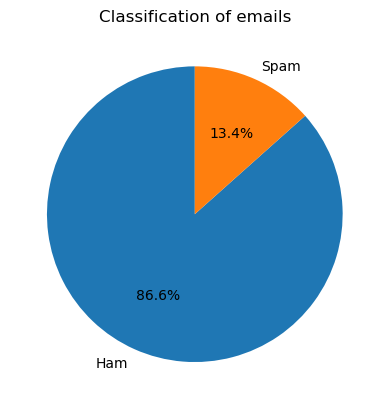

In [10]:
counts=df['v1'].value_counts()
fig, ax = plt.subplots()

ax.pie(counts,labels=['Ham','Spam'],autopct='%1.1f%%',startangle=90)
ax.set_title('Classification of emails')

Text(4.444444444444445, 0.5, 'Counts')

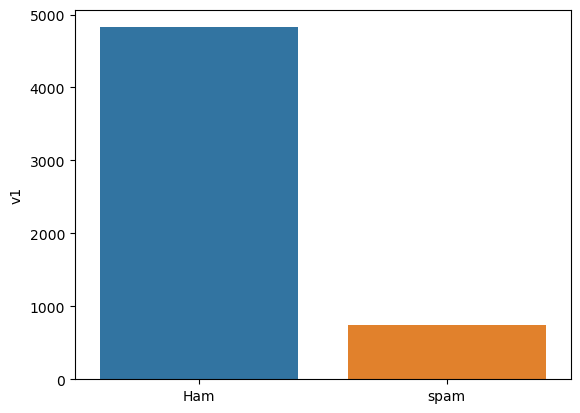

In [11]:
sns.barplot(x=['Ham','spam'],y=counts)
ax.set_title('Classification of emails(Bar graph)')
ax.set_xlabel('v1')
ax.set_ylabel('Counts')

In [13]:
# Manually create a mapping dictionary for decoding
mapping_dict = {0: 'spam', 1: 'ham'}

# Create a new column with the decoded values using the map function
df['v1_decoded'] = df['v1'].map(mapping_dict)

# Display the DataFrame with decoded values
print("\nDecoded DataFrame:")
df


Decoded DataFrame:


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,v3,tokenized_column,stemmed_column,text_length,num_words,num-sents,v1_decoded
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,"go until jurong point, crazy.. available only ...","[Go, jurong, point, ,, crazy, .., Available, b...","[go, jurong, point, ,, crazi, .., avail, bugi,...",111,20,1,spam
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,ok lar... joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[ok, lar, ..., joke, wif, u, oni, ...]",29,8,1,spam
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,free entry in 2 a wkly comp to win fa cup fina...,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",155,32,1,ham
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,u dun say so early hor... u c already then say...,"[U, dun, say, early, hor, ..., U, c, already, ...","[u, dun, say, earli, hor, ..., u, c, alreadi, ...",49,11,1,spam
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,"nah i don't think he goes to usf, he lives aro...","[Nah, I, n't, think, goes, usf, ,, lives, arou...","[nah, i, n't, think, goe, usf, ,, live, around...",61,10,1,spam
...,...,...,...,...,...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,this is the 2nd time we have tried 2 contact u...,"[This, 2nd, time, tried, 2, contact, u., U, å£...","[thi, 2nd, time, tri, 2, contact, u., u, å£750...",161,27,4,ham
5568,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,will ì_ b going to esplanade fr home?,"[Will, Ì_, b, going, esplanade, fr, home, ?]","[will, ì_, b, go, esplanad, fr, home, ?]",37,8,1,spam
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,"pity, * was in mood for that. so...any other s...","[Pity, ,, *, mood, ., So, ..., suggestions, ?]","[piti, ,, *, mood, ., so, ..., suggest, ?]",57,9,2,spam
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,the guy did some bitching but i acted like i'd...,"[The, guy, bitching, I, acted, like, 'd, inter...","[the, guy, bitch, i, act, like, 'd, interest, ...",125,16,1,spam


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91996\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91996\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most common spamming words:
u: 989
gt: 318
lt: 316
get: 301
ok: 261
go: 248
got: 242
ur: 237
know: 236
like: 231


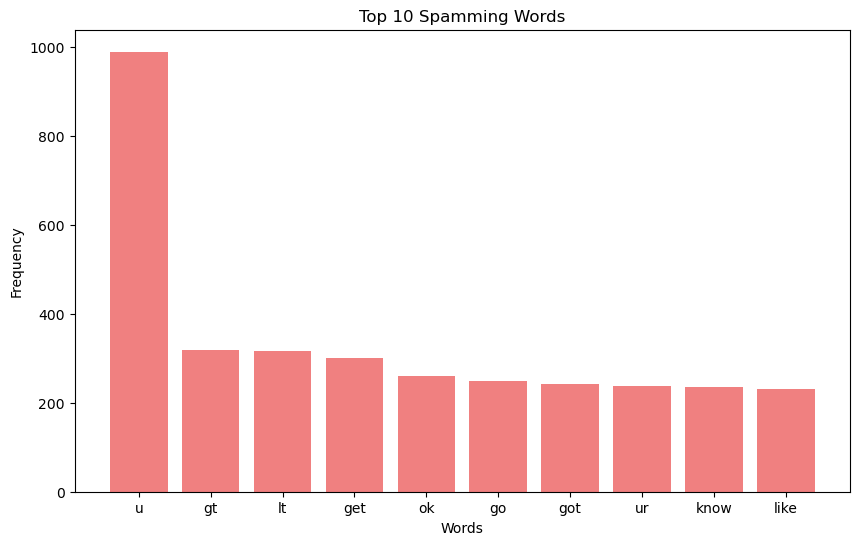

In [14]:
nltk.download('punkt')
nltk.download('stopwords')
# Filter out spam messages
spam_messages = df[df['v1_decoded'] == 'spam']['v2']

# Tokenize and lowercase the words, removing stopwords
stop_words = set(stopwords.words('english'))
all_words = [word.lower() for message in spam_messages for word in word_tokenize(message) if word.isalpha() and word.lower() not in stop_words]

# Count the occurrences of each word
word_counts = Counter(all_words)

# Display the most common spamming words
most_common_words = word_counts.most_common(10)
print("Most common spamming words:")
for word, count in most_common_words:
    print(f"{word}: {count}")

# Plot a bar chart for the top words
plt.figure(figsize=(10, 6))
plt.bar(*zip(*most_common_words), color='lightcoral')
plt.title('Top 10 Spamming Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

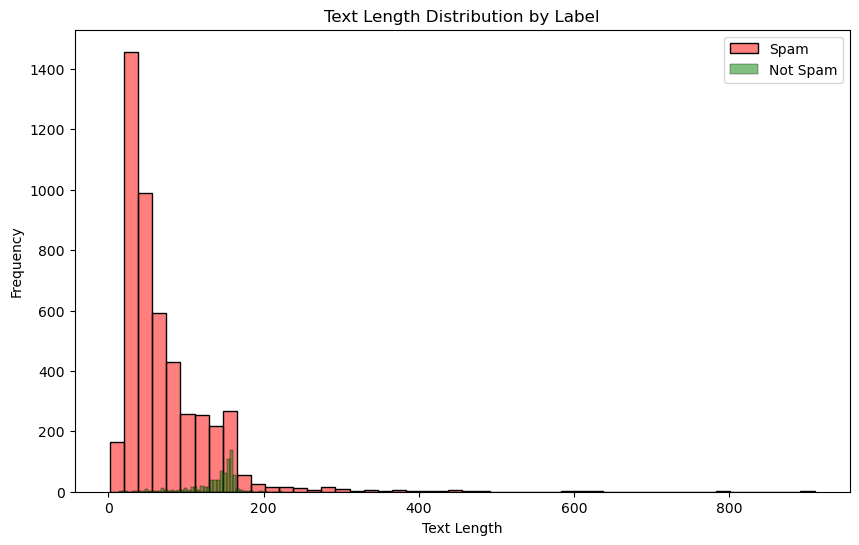

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['v1_decoded'] == 'spam']['v2'].apply(len), bins=50, label='Spam', color='red', alpha=0.5)
sns.histplot(df[df['v1_decoded'] == 'ham']['v2'].apply(len), bins=50, label='Not Spam', color='green', alpha=0.5)
plt.title('Text Length Distribution by Label')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()



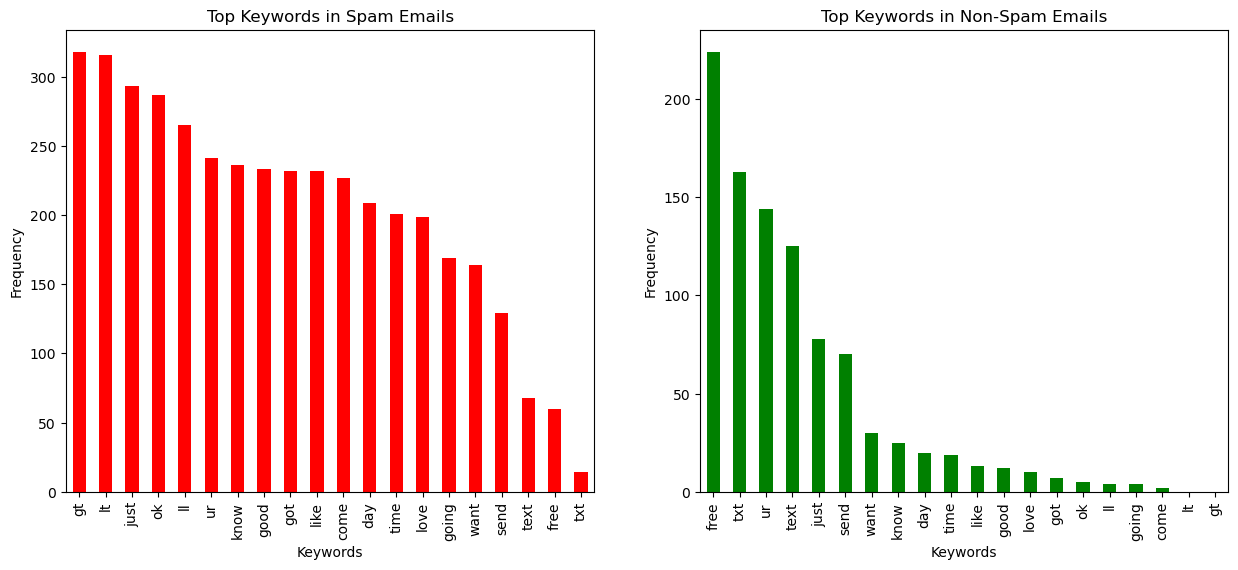

In [16]:
vectorizer = CountVectorizer(max_features=20, stop_words='english')
X = vectorizer.fit_transform(df['v2'])

# Separate into spam and non-spam
spam_keywords = pd.DataFrame(X[df['v1_decoded'] == 'spam'].toarray(), columns=vectorizer.get_feature_names_out())
ham_keywords = pd.DataFrame(X[df['v1_decoded'] == 'ham'].toarray(), columns=vectorizer.get_feature_names_out())

# Plot top keywords
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
spam_keywords.sum().sort_values(ascending=False).plot(kind='bar', color='red')
plt.title('Top Keywords in Spam Emails')
plt.xlabel('Keywords')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
ham_keywords.sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Top Keywords in Non-Spam Emails')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.show()

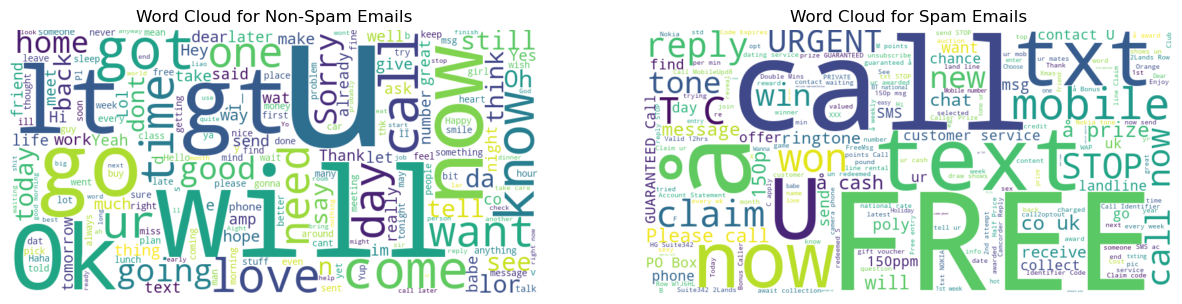

In [18]:
spam_words = ' '.join(df[df['v1_decoded'] == 'spam']['v2'])
ham_words = ' '.join(df[df['v1_decoded'] == 'ham']['v2'])

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(spam_words)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Spam Emails')

plt.subplot(1, 2, 2)
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(ham_words)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Emails')
plt.show()

Training the ML model 

In [21]:
X = df['v2']
y = df['v1_decoded'].map({'ham': 1, 'spam': 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=90)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)
predictions = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9850478468899522
Confusion Matrix:
[[1444    5]
 [  20  203]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1449
           1       0.98      0.91      0.94       223

    accuracy                           0.99      1672
   macro avg       0.98      0.95      0.97      1672
weighted avg       0.98      0.99      0.98      1672



Accuracy: 0.9802631578947368
Confusion Matrix:
[[1447    2]
 [  31  192]]
Precision: 0.9896907216494846
Recall: 0.8609865470852018
F1-Score: 0.920863309352518


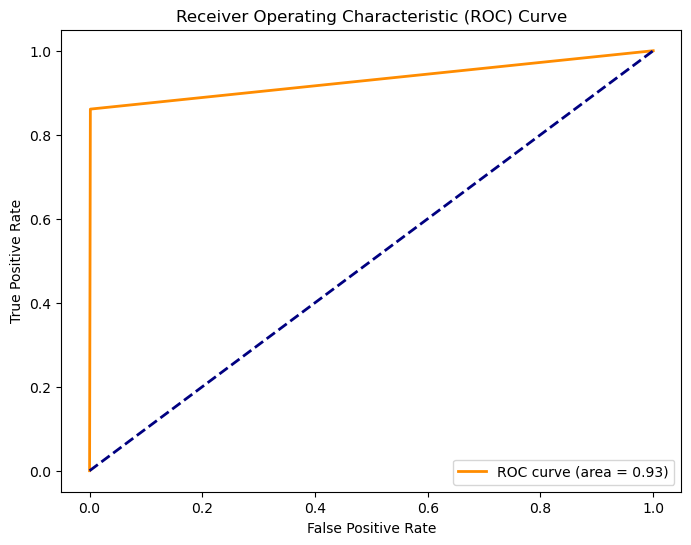

In [22]:
model = SVC()
model.fit(X_train_vec, y_train)

predictions = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predictions)
print(f"Confusion Matrix:\n{conf_matrix}")
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.9730861244019139
Confusion Matrix:
[[1431   18]
 [  27  196]]
Precision: 0.9158878504672897
Recall: 0.8789237668161435
F1-Score: 0.897025171624714


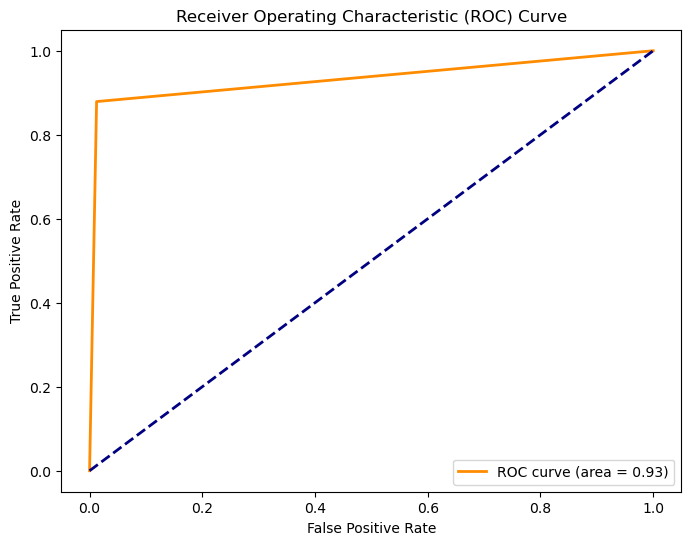

In [23]:
model = DecisionTreeClassifier()
model.fit(X_train_vec, y_train)
predictions = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predictions)
print(f"Confusion Matrix:\n{conf_matrix}")
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Testing on new data values

In [26]:
new_data = ["Congratulation you have won Club membership worth Rs5000", "Your scorecard for the test conducted lastweek is as followed:Pass","My name is Virat"]
new_data_vec = vectorizer.transform(new_data)
predictions = model.predict(new_data_vec)

for text, prediction in zip(new_data, predictions):
    print(f"Text: {text}\nPrediction: {'spam' if prediction == 1 else 'ham'}\n")

Text: Congratulation you have won Club membership worth Rs5000
Prediction: spam

Text: Your scorecard for the test conducted lastweek is as followed:Pass
Prediction: ham

Text: My name is Virat
Prediction: ham

